<h1>Car prediction</h1><hr />

In [1]:
import pandas as pd

carprice_df = pd.read_csv('E:\Programming\Python\DataScience\RealLifeProjects\Projects\CarPricePredictor\car_data.csv')
print(carprice_df.shape)
carprice_df.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
carprice_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [3]:
print(carprice_df.duplicated().sum())
carprice_df[carprice_df.duplicated() == True]

2


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [4]:
carprice_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
print(carprice_df.duplicated().sum())
print(carprice_df.shape)

0
(299, 9)


In [5]:
carprice_df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [6]:
column_lst = ['Fuel_Type', 'Seller_Type', 'Transmission']
for column in column_lst:
    print('{} - {}'.format(column, carprice_df[column].unique()))

Fuel_Type - ['Petrol' 'Diesel' 'CNG']
Seller_Type - ['Dealer' 'Individual']
Transmission - ['Manual' 'Automatic']


In [7]:
dummy_df = pd.get_dummies(carprice_df, columns=column_lst, drop_first=True)
dummy_df.drop(['Car_Name', 'Owner'], axis='columns', inplace=True)
dummy_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,1,0,1
1,2013,4.75,9.54,43000,1,0,0,1
2,2017,7.25,9.85,6900,0,1,0,1
3,2011,2.85,4.15,5200,0,1,0,1
4,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...
294,2016,9.50,11.60,33988,1,0,0,1
295,2015,4.00,5.90,60000,0,1,0,1
296,2009,3.35,11.00,87934,0,1,0,1
297,2017,11.50,12.50,9000,1,0,0,1


In [8]:
current_year = 2021
dummy_df['Car_age'] = abs(dummy_df['Year'].subtract(current_year))
dummy_df.drop(['Year'], axis='columns', inplace=True)

dummy_df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Car_age
0,3.35,5.59,27000,0,1,0,1,7
1,4.75,9.54,43000,1,0,0,1,8
2,7.25,9.85,6900,0,1,0,1,4
3,2.85,4.15,5200,0,1,0,1,10
4,4.60,6.87,42450,1,0,0,1,7
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,1,0,0,1,5
295,4.00,5.90,60000,0,1,0,1,6
296,3.35,11.00,87934,0,1,0,1,12
297,11.50,12.50,9000,1,0,0,1,4


<AxesSubplot:>

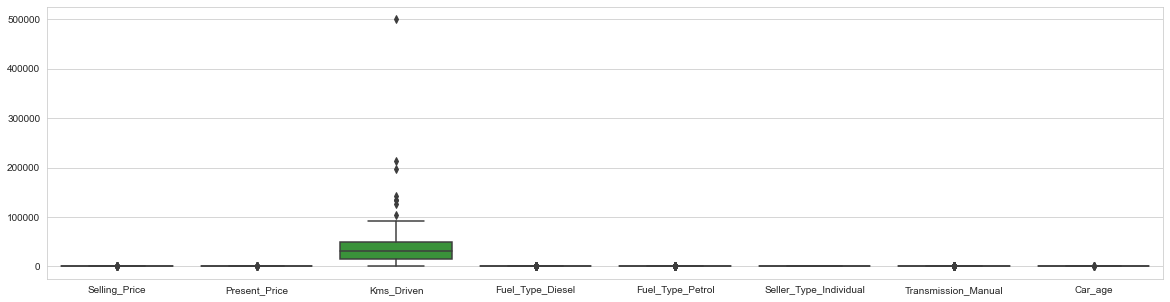

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.boxplot(data=dummy_df)

In [10]:
from scipy.stats import iqr

column_index_lst = [0, 1, 2, 7]

for i in column_index_lst:
    IQR = iqr(dummy_df[dummy_df.columns[i]])
    Q1 = iqr(dummy_df[dummy_df.columns[i]], rng=[0, 25])
    Q3 =  iqr(dummy_df[dummy_df.columns[i]], rng=[0, 75])
    
    
    upp_lmt = Q3 + (1.5*IQR)
    low_lmt = Q1 - (1.5*IQR)
    
    for val in dummy_df[dummy_df.columns[i]]:
        if val < low_lmt:
            dummy_df[dummy_df.columns[i]].replace(to_replace=val, value=low_lmt, inplace=True)
        elif val > upp_lmt:
            dummy_df[dummy_df.columns[i]].replace(to_replace=val, value=upp_lmt, inplace=True)  

<AxesSubplot:>

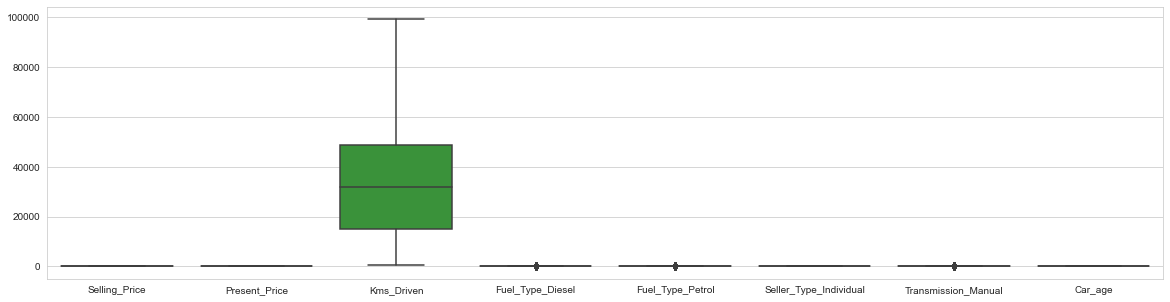

In [11]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=dummy_df)

<AxesSubplot:>

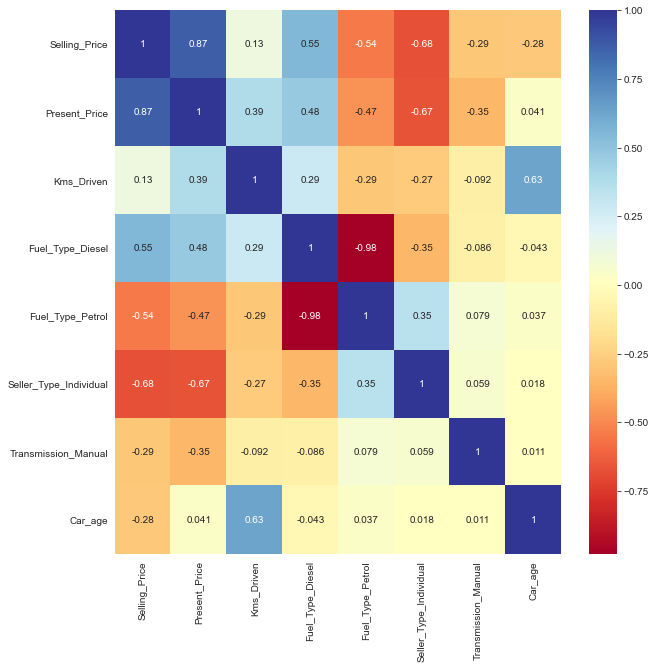

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=dummy_df.corr(), annot=True, cmap='RdYlBu')

In [13]:
final_df = dummy_df
independent_feats = [column for column in final_df.columns if column!='Selling_Price']
X = final_df[independent_feats]
y = final_df['Selling_Price']

In [14]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

extree_model = ExtraTreesRegressor().fit(X, y)
feature_importance_srs = pd.Series(index=X.columns, data=extree_model.feature_importances_)
feature_importance_srs

Present_Price             0.470313
Kms_Driven                0.026583
Fuel_Type_Diesel          0.049562
Fuel_Type_Petrol          0.022803
Seller_Type_Individual    0.298891
Transmission_Manual       0.014742
Car_age                   0.117105
dtype: float64

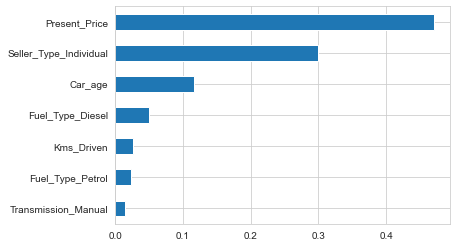

In [15]:
feature_importance_srs.nlargest(X.shape[1]).plot(kind='barh').invert_yaxis()

In [16]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
''' Hyper parameter tuning '''
import numpy as np

# no. of decision trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# no. of features to consider at every split
max_features = ['auto', 'sqrt']

# max no. of levels of trees
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

# minimum number of samples reqd to split at node
min_samples_split = [2, 5, 10, 15, 100]

# minimum number of samples reqd at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [18]:
param_dist = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }
print(param_dist)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [19]:
randforest_mdl = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                  param_distributions=param_dist,
                                  scoring='neg_mean_squared_error',
                                  n_iter=20,
                                  cv=5,
                                  verbose=2,
                                  random_state=42,
                                  n_jobs=1) 

In [20]:
randforest_mdl.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [21]:
print(randforest_mdl.best_estimator_)
print(randforest_mdl.best_score_)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)
-1.0102803243253853


In [22]:
pred = randforest_mdl.predict(X_test)

<AxesSubplot:xlabel='Selling_Price'>

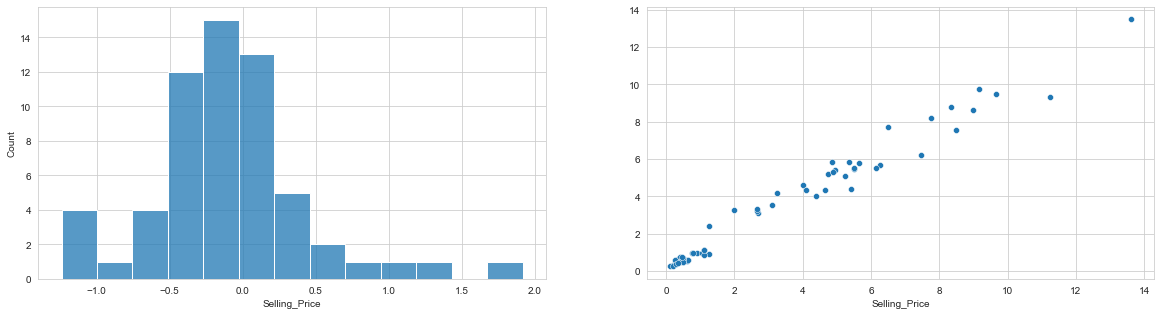

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.histplot(y_test-pred, ax=axs[0])
sns.scatterplot(x=y_test, y=pred, ax=axs[1])

In [24]:
import pickle

with open('carprice_predict_mdl', 'wb') as file:
    pickle.dump(randforest_mdl, file)